# Images

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Basics

In [2]:
image = np.random.random((100, 100))

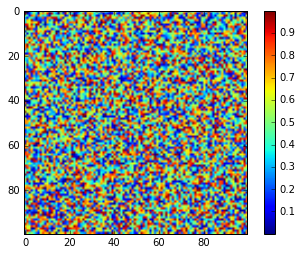

In [3]:
plt.imshow(image)
plt.colorbar()

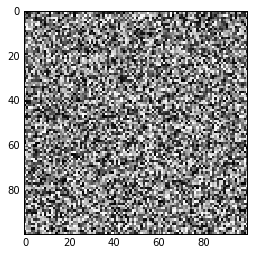

In [4]:
plt.imshow(image, cmap='gray', interpolation='nearest')

In [5]:
image = np.zeros((100, 100, 3))

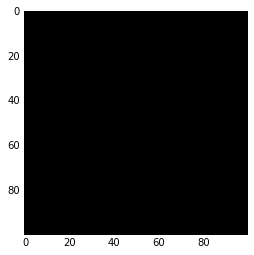

In [6]:
plt.imshow(image)

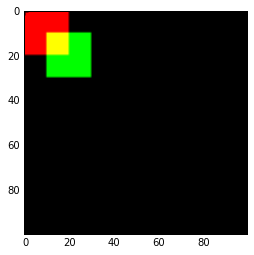

In [7]:
image[:, :, 0] = 0
image[:20, :20, 0] = 1

image[10:30, 10:30, 1] = 1

plt.imshow(image)

## Analysis

In [8]:
import skimage
skimage.__version__

'0.12.3'

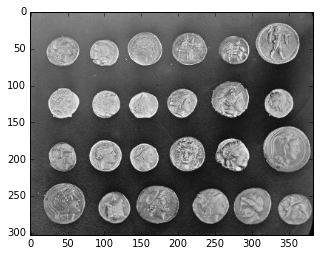

In [25]:
from skimage import data
coins = data.coins()
coins.shape
plt.imshow(coins, cmap='gray')

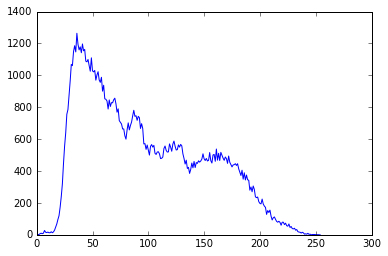

In [27]:
hist, bins = np.histogram(coins, bins = np.arange(0, 256))
plt.plot(bins[:-1], hist)

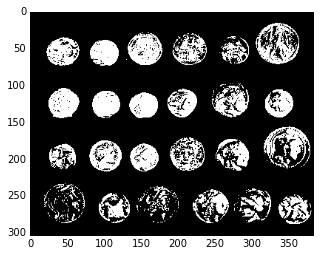

In [34]:
# Homogeneous filter
plt.imshow(coins > 150, cmap = "gray")

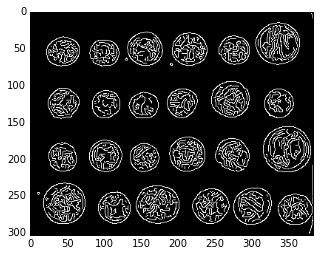

In [37]:
from skimage.feature import canny
plt.imshow(canny(coins), cmap="gray")

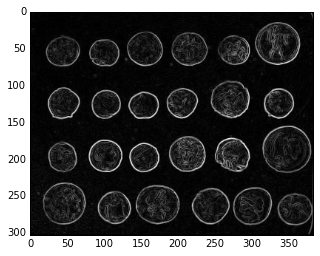

In [38]:
from skimage import filters
out = filters.sobel(coins)
plt.imshow(out, cmap='gray')

## File IO

In [42]:
skimage.io.imsave("sobel_coins.png", out)

/Users/josephmontoya/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


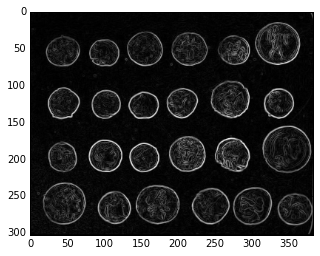

In [44]:
image = skimage.io.imread("sobel_coins.png")
plt.imshow(image, cmap = "gray")

## Exercise: Compare histograms of the original coins image with those of the sobel filtered and canny edge-detected images

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.17208326,  0.04307036, ...,  0.03683979,
         0.00765711,  0.        ],
       [ 0.        ,  0.06139791,  0.02499519, ...,  0.084638  ,
         0.00490196,  0.        ],
       ..., 
       [ 0.        ,  0.03114192,  0.02949335, ...,  0.01669548,
         0.00588235,  0.        ],
       [ 0.        ,  0.04030354,  0.0335059 , ...,  0.00571662,
         0.00980392,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

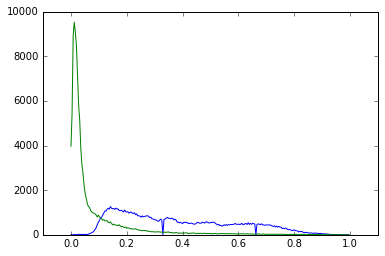

In [58]:
for image in [coins, filters.sobel(coins)]:
    hist, bins = np.histogram(image/np.max(image), 
                              bins = np.linspace(0, 1, 256))
    plt.plot(bins[:-1], hist)
plt.xlim(-0.1, 1.1)
filters.sobel(coins)